In [482]:
import glob
import sqlite3
import pandasql

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats



In [483]:
tennis_date = !git clone https://github.com/JeffSackmann/tennis_atp

In [484]:
glob.glob("tennis_atp/atp_matches_[0123456789]*")

['tennis_atp\\atp_matches_1968.csv',
 'tennis_atp\\atp_matches_1969.csv',
 'tennis_atp\\atp_matches_1970.csv',
 'tennis_atp\\atp_matches_1971.csv',
 'tennis_atp\\atp_matches_1972.csv',
 'tennis_atp\\atp_matches_1973.csv',
 'tennis_atp\\atp_matches_1974.csv',
 'tennis_atp\\atp_matches_1975.csv',
 'tennis_atp\\atp_matches_1976.csv',
 'tennis_atp\\atp_matches_1977.csv',
 'tennis_atp\\atp_matches_1978.csv',
 'tennis_atp\\atp_matches_1979.csv',
 'tennis_atp\\atp_matches_1980.csv',
 'tennis_atp\\atp_matches_1981.csv',
 'tennis_atp\\atp_matches_1982.csv',
 'tennis_atp\\atp_matches_1983.csv',
 'tennis_atp\\atp_matches_1984.csv',
 'tennis_atp\\atp_matches_1985.csv',
 'tennis_atp\\atp_matches_1986.csv',
 'tennis_atp\\atp_matches_1987.csv',
 'tennis_atp\\atp_matches_1988.csv',
 'tennis_atp\\atp_matches_1989.csv',
 'tennis_atp\\atp_matches_1990.csv',
 'tennis_atp\\atp_matches_1991.csv',
 'tennis_atp\\atp_matches_1992.csv',
 'tennis_atp\\atp_matches_1993.csv',
 'tennis_atp\\atp_matches_1994.csv',
 

In [485]:
atp_matches = pd.concat(
    [pd.read_csv(i) for i in glob.glob("tennis_atp/atp_matches_[12][019][01298]*")],
    axis=0,
)

In [486]:
atp_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142226 entries, 0 to 2915
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          142226 non-null  object 
 1   tourney_name        142226 non-null  object 
 2   surface             142199 non-null  object 
 3   draw_size           142226 non-null  int64  
 4   tourney_level       142226 non-null  object 
 5   tourney_date        142226 non-null  int64  
 6   match_num           142226 non-null  int64  
 7   winner_id           142226 non-null  int64  
 8   winner_seed         58505 non-null   object 
 9   winner_entry        15558 non-null   object 
 10  winner_name         142226 non-null  object 
 11  winner_hand         142215 non-null  object 
 12  winner_ht           138262 non-null  float64
 13  winner_ioc          142226 non-null  object 
 14  winner_age          142088 non-null  float64
 15  loser_id            142226 non-null 

In [487]:
cols_null_percent = atp_matches.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

winner_entry          89.061072
loser_entry           81.641894
loser_seed            78.195970
winner_seed           58.864765
minutes               37.067062
w_1stWon              35.245314
w_ace                 35.245314
w_bpFaced             35.245314
w_bpSaved             35.245314
w_2ndWon              35.245314
w_1stIn               35.245314
w_svpt                35.245314
w_df                  35.245314
l_svpt                35.245314
l_df                  35.245314
l_1stIn               35.245314
l_1stWon              35.245314
l_2ndWon              35.245314
l_bpSaved             35.245314
l_bpFaced             35.245314
l_ace                 35.245314
l_SvGms               35.244611
w_SvGms               35.244611
loser_rank_points     28.046208
winner_rank_points    27.086468
loser_rank             7.942992
loser_ht               5.809064
winner_rank            4.523786
winner_ht              2.787113
loser_age              0.380381
winner_age             0.097029
loser_ha

In [488]:
atp_matches['tourney_date'] = pd.to_datetime(atp_matches['tourney_date'], format='%Y%m%d')

<AxesSubplot: >

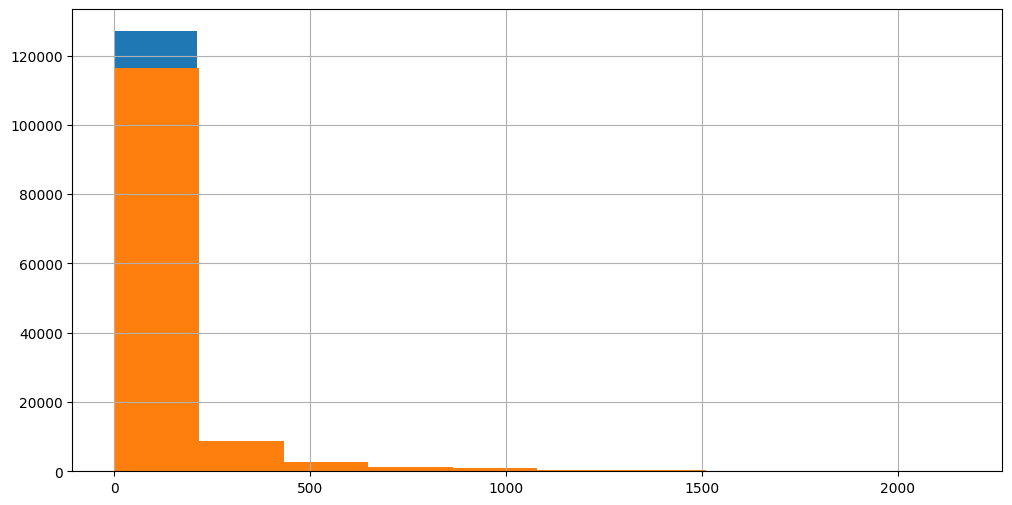

In [489]:
atp_matches['winner_rank'].hist()
atp_matches['loser_rank'].hist()

In [490]:
n = atp_matches.shape[0] 
thresh1 = n*0.64
atp_matches = atp_matches.dropna( thresh=thresh1, axis=1)

m = atp_matches.shape[1]
atp_matches = atp_matches.dropna( thresh=m-2, axis=0)

In [491]:
atp_matches = atp_matches.reset_index()

<AxesSubplot: >

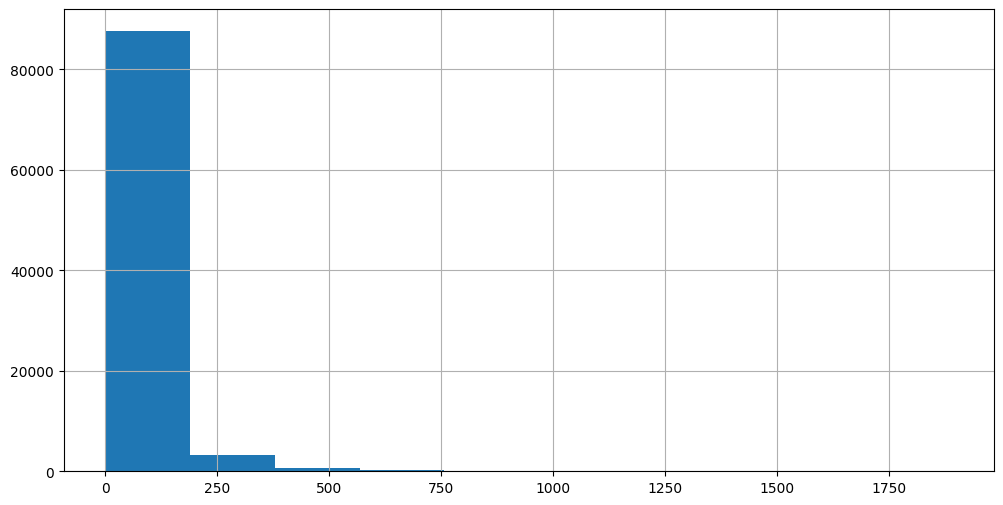

In [492]:
atp_matches['winner_rank'].hist()

((array([-4.32735117, -4.1277583 , -4.01916863, ...,  4.01916863,
          4.1277583 ,  4.32735117]),
  array([0.69314718, 0.69314718, 0.69314718, ...,        nan,        nan,
                nan])),
 (nan, nan, nan))

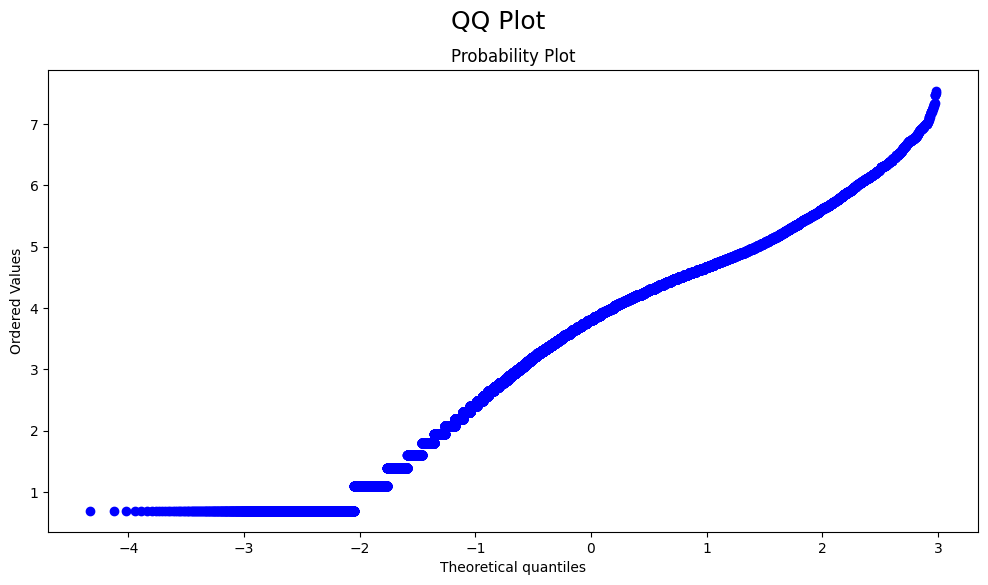

In [493]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(np.log(atp_matches['winner_rank']+1), dist="norm", plot=ax1)

Впринципе это близко к нормальному распределнию, поэтому будет смотреть на параметические тесты

In [494]:
#atp_matches['loser_rank'].isna().sum()

In [495]:
atp_matches['winner_rank'].describe()

count    91729.000000
mean        63.686577
std         81.429874
min          1.000000
25%         18.000000
50%         44.000000
75%         83.000000
max       1890.000000
Name: winner_rank, dtype: float64

In [496]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [497]:
outliers, cleaned = outliers_iqr(atp_matches, 'winner_rank')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 4552
Результирующее число записей: 87177


In [498]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [499]:
outliers, cleaned = outliers_z_score(atp_matches, 'winner_rank', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 34
Результирующее число записей: 91695


<AxesSubplot: >

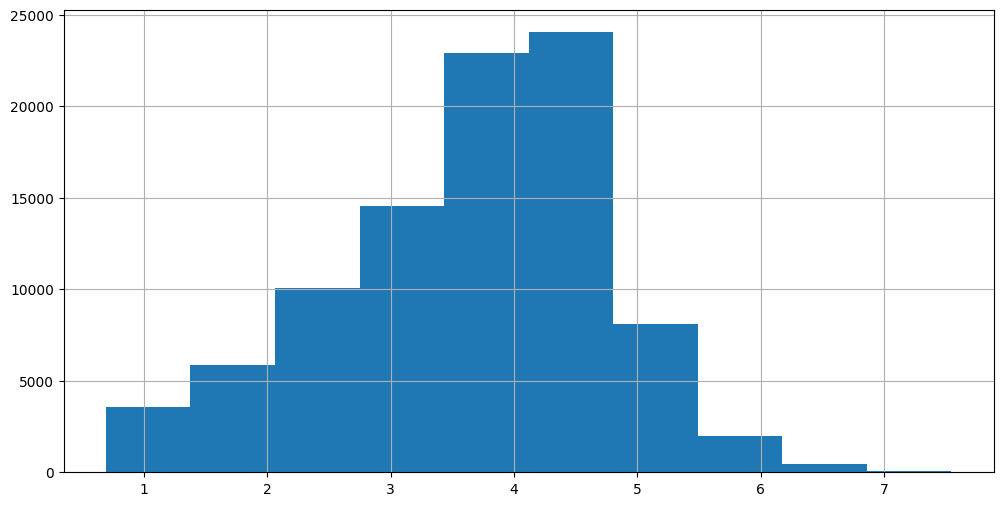

In [500]:
np.log(atp_matches['winner_rank']+1).hist()

In [670]:
mean = atp_matches.groupby('tourney_date')['winner_rank'].mean()

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

In [671]:
stats.shapiro(mean)

ShapiroResult(statistic=0.968437135219574, pvalue=0.4382939040660858)

In [503]:
atp_matches['diff_winner_rank'] = abs(atp_matches['winner_rank'] - atp_matches['loser_rank'])
atp_matches['diff_winner_rank']

0         54.0
1        229.0
2         13.0
3         34.0
4         60.0
         ...  
91855    988.0
91856    322.0
91857     27.0
91858    582.0
91859    822.0
Name: diff_winner_rank, Length: 91860, dtype: float64

In [504]:
diff_rank_20 = pandasql.sqldf(""" 
    SELECT *
    FROM atp_matches
    WHERE diff_winner_rank > 20;""")

In [505]:
stats.shapiro(diff_rank_20['winner_rank'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6071903705596924, pvalue=0.0)

((array([-4.25836107, -4.05569075, -3.94531262, ...,  3.94531262,
          4.05569075,  4.25836107]),
  array([0.        , 0.        , 0.        , ..., 7.48099216, 7.50714108,
         7.54433211])),
 (1.2336202314173343, 3.6165691289033126, 0.9838091800737084))

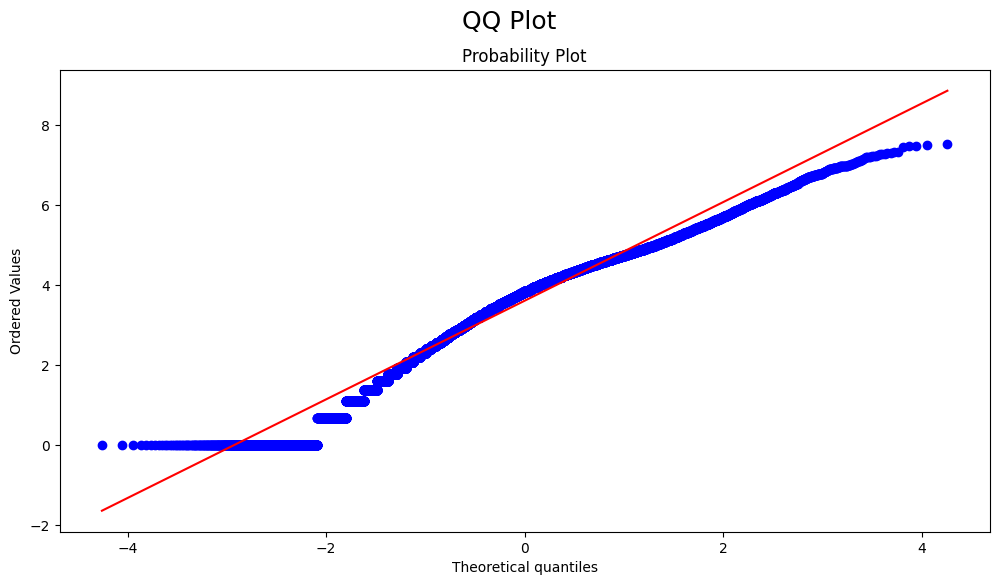

In [506]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(np.log(diff_rank_20['winner_rank']), dist="norm", plot=ax1)

In [507]:
diff_rank_less20 = pandasql.sqldf(""" 
    SELECT *
    FROM atp_matches
    WHERE diff_winner_rank <= 20
    ;"""
)

In [508]:
stats.shapiro(diff_rank_less20['winner_rank'])

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8353451490402222, pvalue=0.0)

((array([-4.02308512, -3.80918122, -3.69222904, ...,  3.69222904,
          3.80918122,  4.02308512]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.53233429, 6.88959131,
         7.19668657])),
 (1.0044186468574243, 3.461851220665759, 0.9682530360784841))

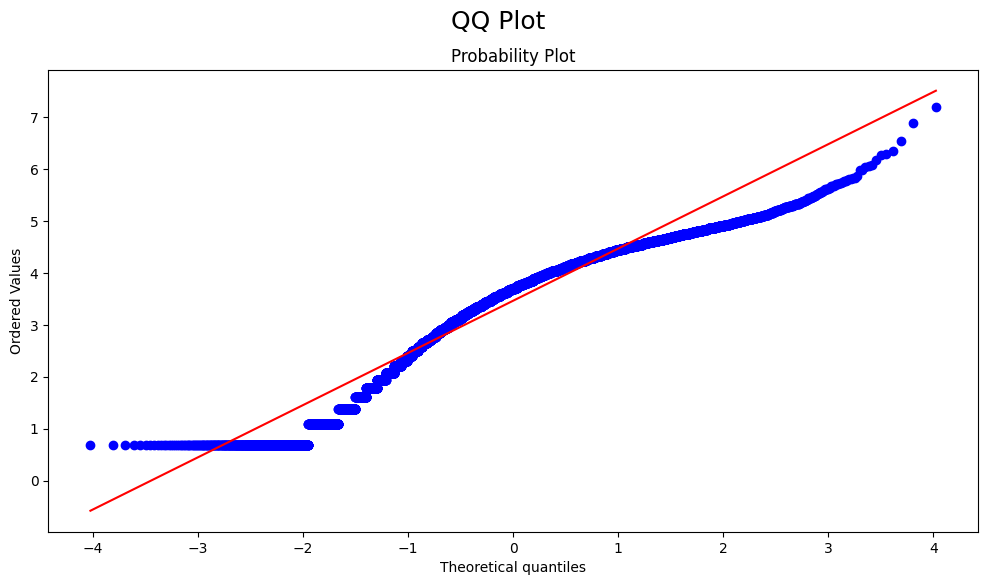

In [509]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(
    np.log(diff_rank_less20['winner_rank']+1), dist="norm", plot=ax1
)

Т.К. распределение близко к нормальному (логонормальное),  мы переходим к параметрическим тестам для проверки нашей нулевой гипотезы. Мы сравниваем количественные переменные, значит используем тест на сравнение выборок. Групп для сравнения всего две, и объектов в каждой выборке >= 30. Нужно использовать Z-тест, но так как мы не знаем дисперсию и среднее отклоенение, то используем T-тест.

In [510]:
H0 = 'Шанс выиграша равен независимо от Ранга'
H1 = 'Больший ранг влияет на результат выигрыша'

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [672]:
stats.ttest_ind(diff_rank_20['winner_rank'],diff_rank_less20['winner_rank'], equal_var=True)

Ttest_indResult(statistic=37.712716834408475, pvalue=7.378827437565154e-309)

In [511]:
stats.ttest_ind(
    np.log(diff_rank_20['winner_rank']+1),
    np.log(diff_rank_less20['winner_rank']+1), equal_var=True
)

Ttest_indResult(statistic=25.342077678475647, pvalue=3.387209976920035e-141)

Мы видим, что p-value сильно ниже 0.05 => мы отвергаем Н0 (нулевую гипотезу)

                                                Теперь разберемся с игроками в диапозоне +/- 5 ранга.


In [512]:
atp_matches['winner_rank'].describe()

count    91729.000000
mean        63.686577
std         81.429874
min          1.000000
25%         18.000000
50%         44.000000
75%         83.000000
max       1890.000000
Name: winner_rank, dtype: float64

In [513]:
atp_matches.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank
0,0,1991-339,Adelaide,Hard,32,A,1990-12-31,1,101723,Magnus Larsson,...,44.0,23.0,16.0,6.0,8.0,56.0,NaN,2.0,NaN,54.0
1,1,1991-339,Adelaide,Hard,32,A,1990-12-31,2,100946,Slobodan Zivojinovic,...,35.0,27.0,15.0,1.0,2.0,304.0,NaN,75.0,NaN,229.0
2,2,1991-339,Adelaide,Hard,32,A,1990-12-31,3,101234,Patrik Kuhnen,...,22.0,6.0,8.0,4.0,8.0,82.0,NaN,69.0,NaN,13.0
3,3,1991-339,Adelaide,Hard,32,A,1990-12-31,4,101889,Todd Woodbridge,...,30.0,11.0,10.0,5.0,8.0,50.0,NaN,84.0,NaN,34.0
4,4,1991-339,Adelaide,Hard,32,A,1990-12-31,5,101274,Udo Riglewski,...,28.0,15.0,11.0,4.0,8.0,88.0,NaN,28.0,NaN,60.0


In [514]:
diff_rank_5 = atp_matches[atp_matches['diff_winner_rank'] <=5]

In [515]:
diff_rank_5 = diff_rank_5.reset_index()

In [516]:
diff_rank_5

,level_0,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank
0,5,5,1991-339,Adelaide,Hard,32,A,1990-12-31,6,102148,...,20.0,8.0,9.0,10.0,16.0,62.0,NaN,59.0,NaN,3.0
1,27,28,1991-339,Adelaide,Hard,32,A,1990-12-31,29,101900,...,24.0,13.0,11.0,3.0,7.0,51.0,NaN,56.0,NaN,5.0
2,31,32,1991-354,Wellington,Hard,32,A,1990-12-31,2,101265,...,22.0,8.0,8.0,6.0,11.0,120.0,NaN,123.0,NaN,3.0
3,43,44,1991-354,Wellington,Hard,32,A,1990-12-31,14,101354,...,20.0,10.0,10.0,1.0,5.0,104.0,NaN,107.0,NaN,3.0
4,51,52,1991-354,Wellington,Hard,32,A,1990-12-31,22,100962,...,14.0,15.0,9.0,2.0,5.0,91.0,NaN,89.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6397,91802,2705,2022-0605,Tour Finals,Hard,8,F,2022-11-14,288,126094,...,65.0,18.0,17.0,6.0,9.0,7.0,3530.0,5.0,4065.0,2.0
6398,91803,2706,2022-0605,Tour Finals,Hard,8,F,2022-11-14,287,104925,...,60.0,17.0,16.0,4.0,6.0,8.0,3320.0,5.0,4065.0,3.0
6399,91804,2707,2022-0605,Tour Finals,Hard,8,F,2022-11-14,286,104925,...,22.0,9.0,8.0,1.0,4.0,8.0,3320.0,7.0,3530.0,1.0
6400,91809,2775,2022-M-DC-2022-QLS-M-AUS-HUN-01,Davis Cup QLS R1: AUS vs HUN,Hard,4,D,2022-03-04,4,200282,...,35.0,20.0,11.0,7.0,9.0,30.0,1486.0,35.0,1382.0,5.0


In [517]:
diff_rank_greater5 = atp_matches[atp_matches['diff_winner_rank'] >5]

In [518]:
plot_1 = diff_rank_5.groupby('tourney_date')['winner_rank'].mean()

<AxesSubplot: xlabel='tourney_date', ylabel='winner_rank'>

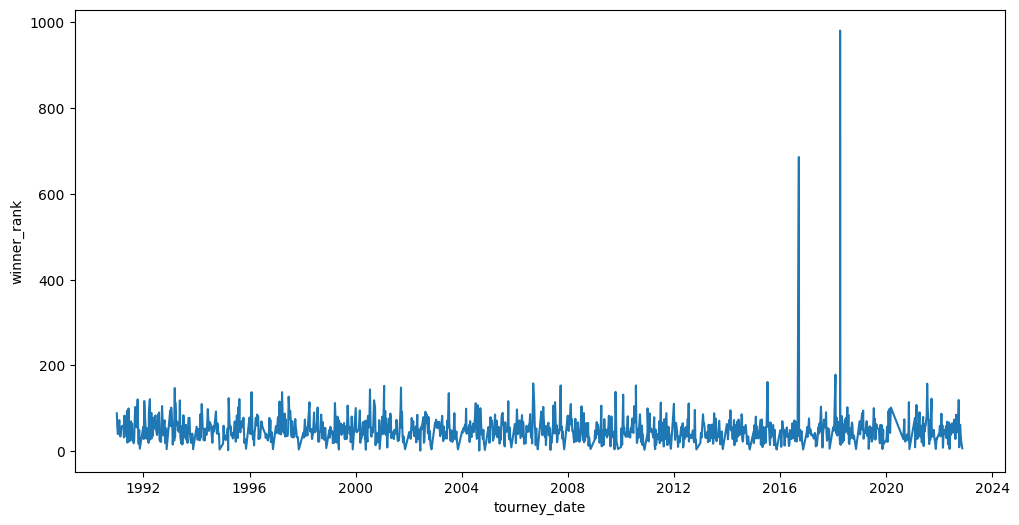

In [519]:
sns.lineplot(data = plot_1)

In [520]:
plot_2 = diff_rank_greater5.groupby('tourney_date')['winner_rank'].mean()

<AxesSubplot: xlabel='tourney_date', ylabel='winner_rank'>

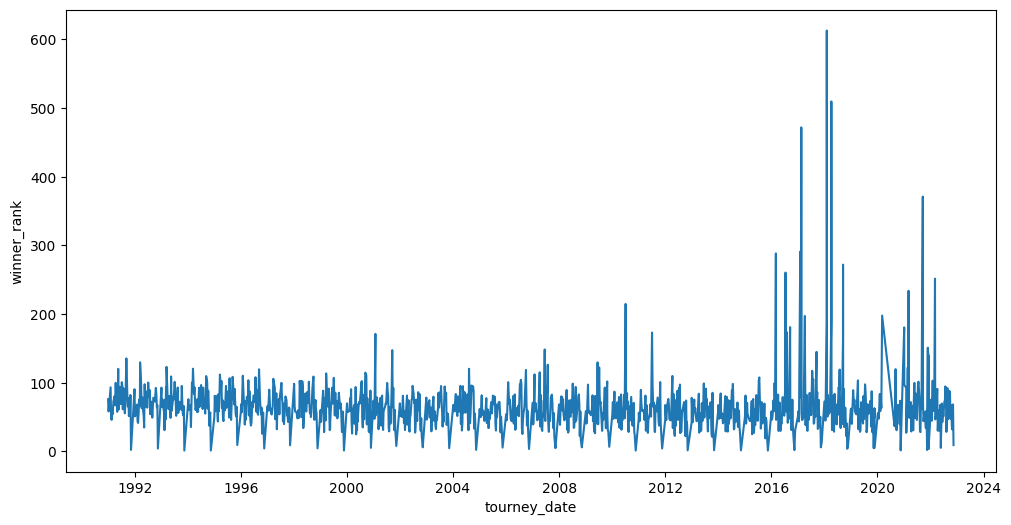

In [521]:
sns.lineplot(data = plot_2)

In [522]:
stats.shapiro(plot_1)

ShapiroResult(statistic=0.5093083381652832, pvalue=0.0)

In [523]:
stats.shapiro(plot_2)

ShapiroResult(statistic=0.6576204299926758, pvalue=1.401298464324817e-44)

In [524]:
H0 = 'Ранг в пределах +/-5 не влияет на вероятность победы'
H1 = 'Влияет'

In [525]:
stats.ttest_ind(plot_1, plot_2)

Ttest_indResult(statistic=-8.872850998019663, pvalue=1.3398892431164636e-18)

P-value меньше 0,05 => тоже отвергаем H0

Правда ли, что среднее количество сетов, которое необходимо любому игроку для победы в матче, сокращается со временем?

In [526]:
atp_matches["score"]

0         6-4 3-6 7-6(2)
1         6-3 3-6 7-6(6)
2                6-0 6-4
3             7-6(2) 6-1
4                7-5 6-3
              ...       
91855        6-2 4-6 6-3
91856            6-3 7-5
91857            6-4 6-4
91858        4-6 6-4 6-4
91859    1-6 6-4 4-1 RET
Name: score, Length: 91860, dtype: object

In [527]:
atp_matches["score"] = atp_matches["score"].fillna('3-4 4-2')

In [528]:
atp_matches["score"].isna().sum()

0

In [529]:
atp_matches["sets_num"] = atp_matches["score"].map(lambda x: len(x.split()))

In [530]:
atp_matches["sets_num"].mean()

2.603080775092532

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='sets_num'>

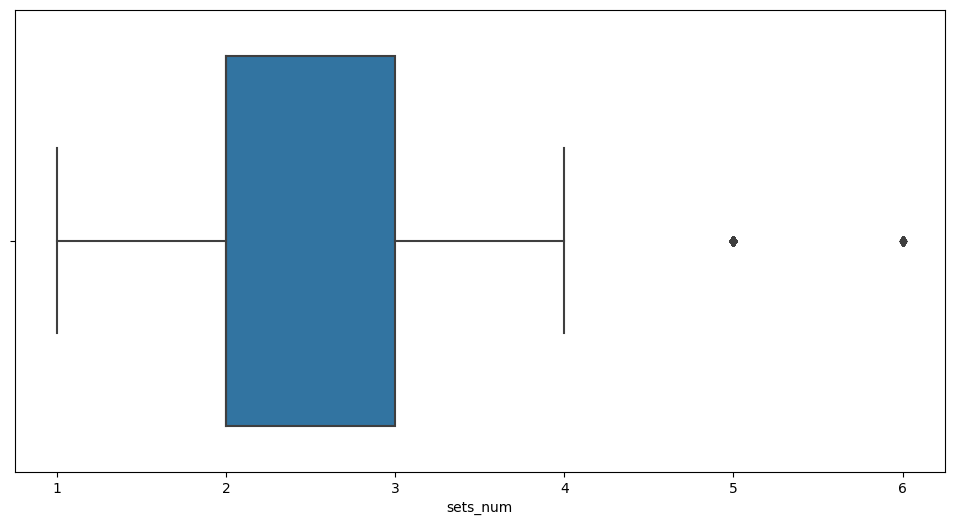

In [531]:
sns.boxplot(atp_matches['sets_num'])

Разбейте данные на две группы — с 1980 до 2001 гг. и 2002-2022 гг.

In [532]:
atp_matches["tourney_date"] = atp_matches["tourney_date"].dt.year

<AxesSubplot: >

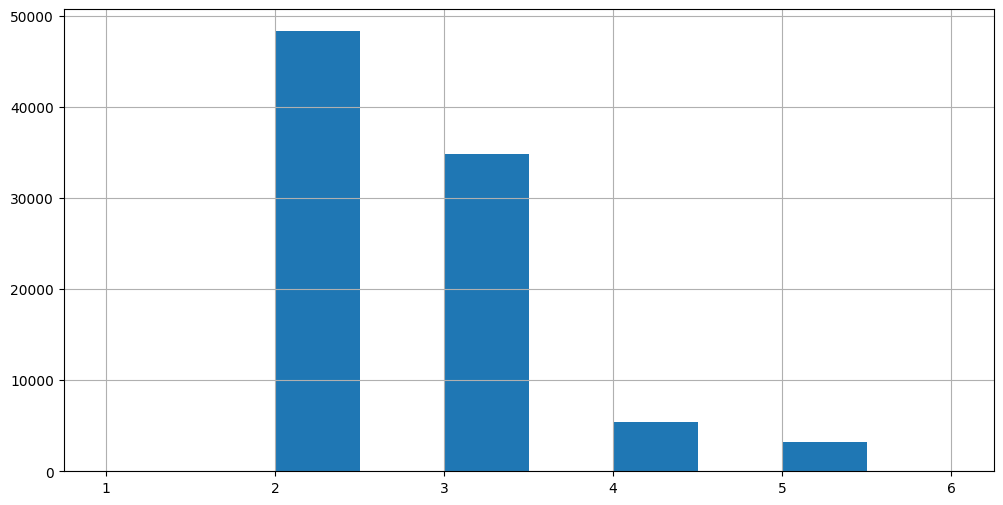

In [533]:
atp_matches['sets_num'].hist()

In [534]:
mean_year_sets = atp_matches.groupby('tourney_date')['sets_num'].mean()

((array([-2.03779133, -1.64072656, -1.40239528, -1.22456199, -1.07878552,
         -0.95292829, -0.84060464, -0.73800319, -0.64264332, -0.55280255,
         -0.46722113, -0.38493614, -0.30518168, -0.22732525, -0.15082484,
         -0.07519829,  0.        ,  0.07519829,  0.15082484,  0.22732525,
          0.30518168,  0.38493614,  0.46722113,  0.55280255,  0.64264332,
          0.73800319,  0.84060464,  0.95292829,  1.07878552,  1.22456199,
          1.40239528,  1.64072656,  2.03779133]),
  array([2.33333333, 2.54227232, 2.54280773, 2.54796889, 2.54814815,
         2.56057991, 2.56420596, 2.57712126, 2.5814938 , 2.58372903,
         2.5882718 , 2.58952537, 2.59024935, 2.59250765, 2.5950643 ,
         2.59594497, 2.60183611, 2.60268356, 2.60329341, 2.60632868,
         2.61027523, 2.61149346, 2.61790715, 2.62403101, 2.6248996 ,
         2.62672282, 2.64375716, 2.64487768, 2.64672037, 2.6618705 ,
         2.68151758, 2.70359915, 2.73153409])),
 (0.0598893533348497, 2.599290041343407, 0.8

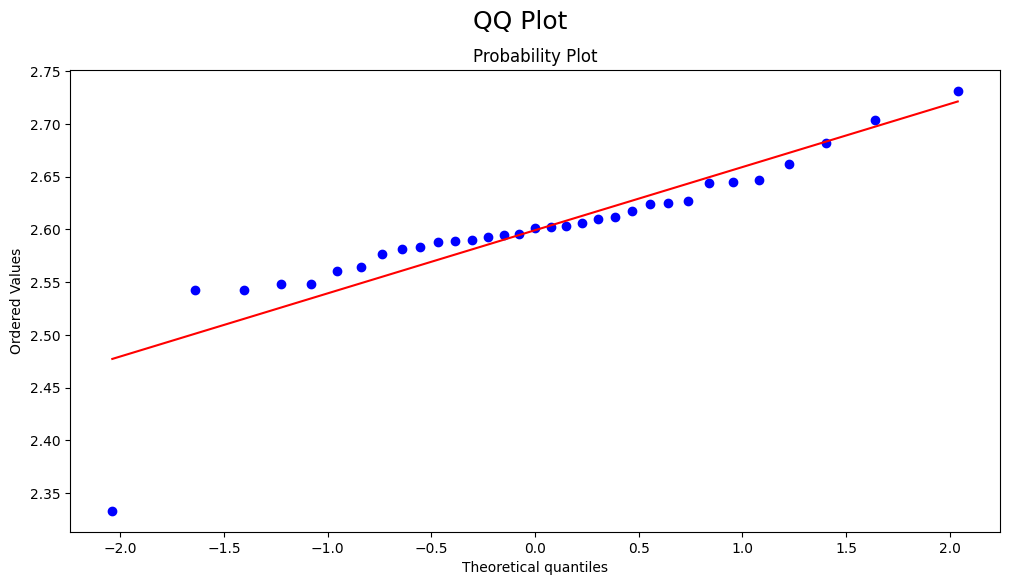

In [535]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(mean_year_sets, dist="norm", plot=ax1
)

In [536]:
stats.shapiro(mean_year_sets)


ShapiroResult(statistic=0.8240476846694946, pvalue=9.608671825844795e-05)

In [537]:
stats.normaltest(mean_year_sets)

NormaltestResult(statistic=28.645479948403906, pvalue=6.021616089846176e-07)

In [538]:
atp_matches_1980_2001 = atp_matches[atp_matches['tourney_date'] <= 2001]

In [539]:
atp_matches_2002_2022 = atp_matches[atp_matches['tourney_date'] >=  2002]

In [540]:
mean_sets_over2002 = atp_matches_2002_2022.groupby('tourney_date')['sets_num'].mean()

In [541]:
stats.shapiro(mean_sets_over2002)

ShapiroResult(statistic=0.9344442486763, pvalue=0.16895142197608948)

((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([2.56057991, 2.57712126, 2.59024935, 2.59250765, 2.5950643 ,
         2.59594497, 2.60268356, 2.60329341, 2.61027523, 2.61149346,
         2.61790715, 2.62403101, 2.6248996 , 2.62672282, 2.64375716,
         2.64487768, 2.64672037, 2.6618705 , 2.68151758, 2.70359915,
         2.73153409])),
 (0.04249693074817507, 2.62603096223051, 0.9640407892556211))

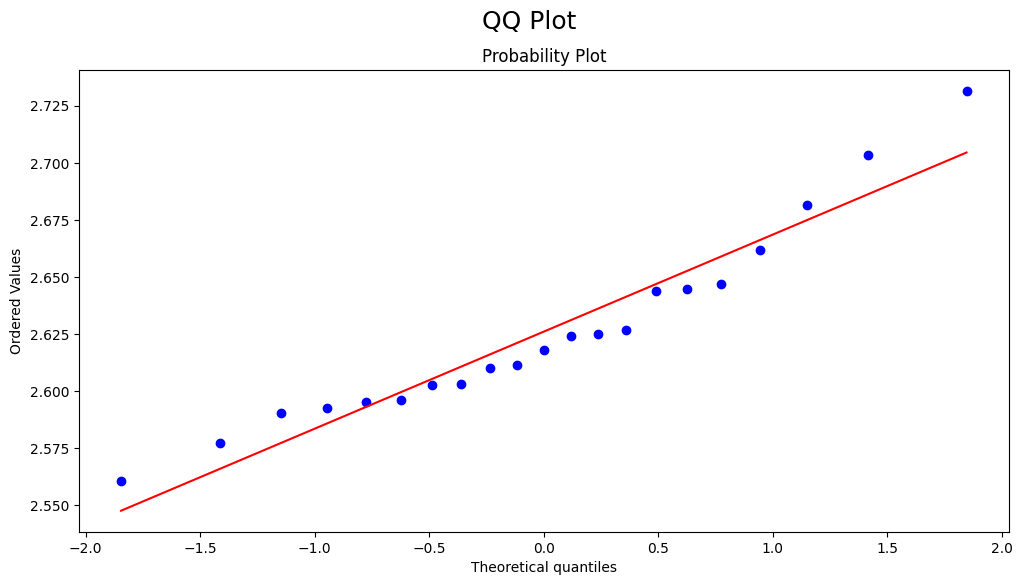

In [542]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(mean_sets_over2002, dist="norm", plot=ax1
)

In [543]:
mean_sets_less2001 = atp_matches_1980_2001.groupby('tourney_date')['sets_num'].mean()

In [544]:
stats.shapiro(mean_sets_less2001)

ShapiroResult(statistic=0.623005211353302, pvalue=0.00016798902652226388)

((array([-1.58815464, -1.09814975, -0.78255927, -0.53069113, -0.30892353,
         -0.101534  ,  0.101534  ,  0.30892353,  0.53069113,  0.78255927,
          1.09814975,  1.58815464]),
  array([2.33333333, 2.54227232, 2.54280773, 2.54796889, 2.54814815,
         2.56420596, 2.5814938 , 2.58372903, 2.5882718 , 2.58952537,
         2.60183611, 2.60632868])),
 (0.06024433709908823, 2.5524934297909763, 0.7678556386011608))

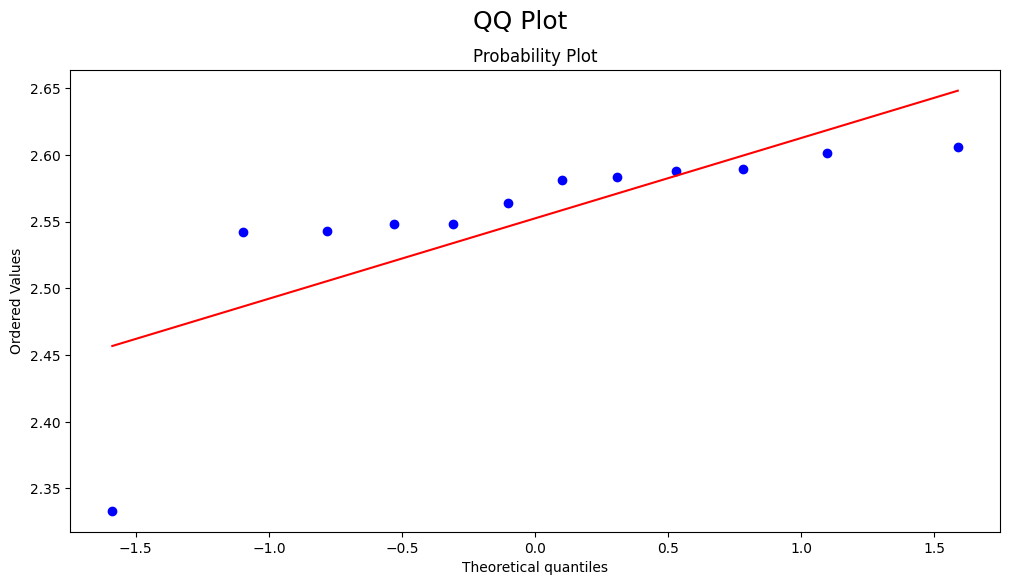

In [545]:
fig, (ax1) = plt.subplots(1)
fig.suptitle('QQ Plot', fontsize=18)
stats.probplot(mean_sets_less2001, dist="norm", plot=ax1
)

Как изменилось среднее количество сетов, которое победитель затратил на игру?

 Как изменилось среднее количество сетов, которое победитель затратил на игру?

Почти не изменилось, незначительно выше

In [546]:
H0 = 'Среднее количество сетов со временем не изменялось'
HA = 'Среднее количество сетов со временем изменялось в сторону увеличения'

Количество наблюдение у нас большое. Мы работает на выборке генеральной совокупности, следовательно мы не знаем среднего отклонения генеральной совокупности, поэтому надо бы делать t-тест. 

<AxesSubplot: xlabel='tourney_date', ylabel='sets_num'>

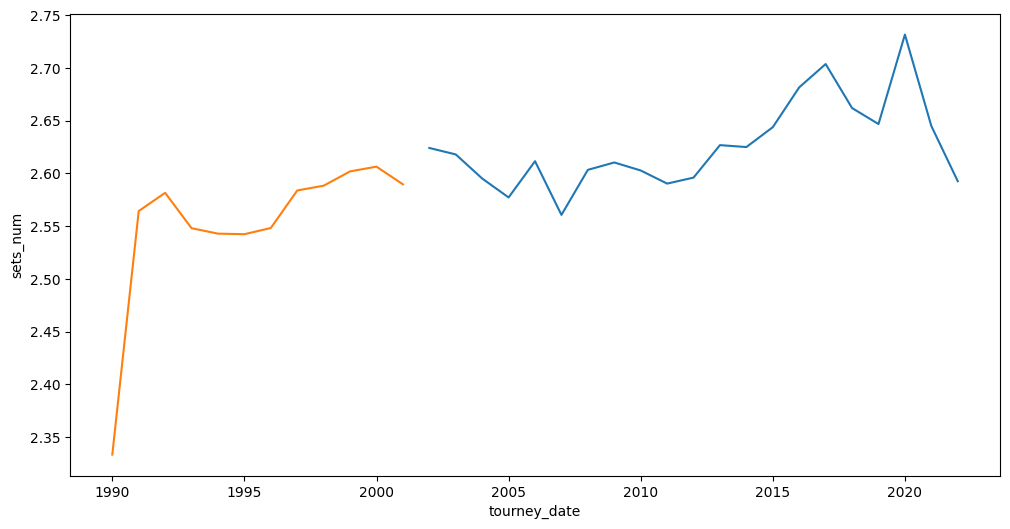

In [547]:
sns.lineplot(data = mean_sets_over2002)
sns.lineplot(data = mean_sets_less2001)

In [604]:
stats.ttest_ind(mean_sets_over2002, mean_sets_less2001, equal_var=True)

Ttest_indResult(statistic=3.703127837485864, pvalue=0.0008274463141046852)

p-value < 0.05 - следовательно отвергаем H0

. Оставьте только матчи best of 5 (колонка best_of) и определите — является ли разница среднего количества сетов, которое сыграл победитель, значимой для выборок матчей по 1980 до 2001 гг. и 2002-2022 гг. Выбор статистического теста обоснуйте.

In [549]:
mask = atp_matches_1980_2001['best_of'] == 5
atp_matches_1980_2001_best5 = atp_matches_1980_2001[mask]
atp_matches_1980_2001_best5.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
120,124,1991-580,Australian Open,Hard,128,G,1991,1,101222,Stefan Edberg,...,11.0,14.0,4.0,10.0,1.0,3889.0,162.0,202.0,161.0,3
121,125,1991-580,Australian Open,Hard,128,G,1991,2,100995,Eduardo Masso,...,29.0,26.0,7.0,18.0,124.0,278.0,81.0,453.0,43.0,5
122,126,1991-580,Australian Open,Hard,128,G,1991,3,101138,Pat Cash,...,12.0,12.0,9.0,16.0,84.0,432.0,32.0,845.0,52.0,3
123,127,1991-580,Australian Open,Hard,128,G,1991,4,100870,Christo Van Rensburg,...,26.0,14.0,8.0,15.0,59.0,527.0,82.0,448.0,23.0,3
124,128,1991-580,Australian Open,Hard,128,G,1991,5,101731,Nuno Marques,...,28.0,23.0,9.0,13.0,104.0,340.0,116.0,299.0,12.0,5


In [550]:
mask1 = atp_matches_2002_2022['best_of'] == 5
atp_matches_2002_2022_best5 = atp_matches_2002_2022[mask1]
atp_matches_2002_2022_best5.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num
35728,225,2002-314,Gstaad,Clay,32,A,2002,31,102374,Alex Corretja,...,24.0,16.0,5.0,9.0,28.0,1145.0,27.0,1198.0,1.0,3
35868,365,2002-319,Kitzbuhel,Clay,48,A,2002,47,102374,Alex Corretja,...,6.0,13.0,5.0,13.0,31.0,1095.0,8.0,2050.0,23.0,3
35899,396,2002-321,Stuttgart,Clay,32,A,2002,31,104022,Mikhail Youzhny,...,31.0,23.0,5.0,9.0,62.0,653.0,19.0,1585.0,43.0,5
35961,458,2002-328,Basel,Carpet,32,A,2002,31,103900,David Nalbandian,...,11.0,14.0,3.0,8.0,18.0,1592.0,20.0,1513.0,2.0,3
36075,575,2002-337,Vienna,Hard,32,A,2002,31,103819,Roger Federer,...,24.0,18.0,6.0,12.0,13.0,1925.0,12.0,1961.0,1.0,4


In [551]:
best_5_mean_over2022 = atp_matches_2002_2022_best5.groupby(
    'tourney_date'
)['sets_num'].mean()

best_5_mean_over2022.head()

tourney_date
2002    3.773512
2003    3.722868
2004    3.707930
2005    3.673745
2006    3.673077
Name: sets_num, dtype: float64

In [552]:
best_5_mean_less2001 = atp_matches_1980_2001_best5.groupby(
    'tourney_date'
)['sets_num'].mean()

best_5_mean_less2001.head()

tourney_date
1991    3.767123
1992    3.741874
1993    3.727273
1994    3.706897
1995    3.642715
Name: sets_num, dtype: float64

<AxesSubplot: xlabel='tourney_date', ylabel='sets_num'>

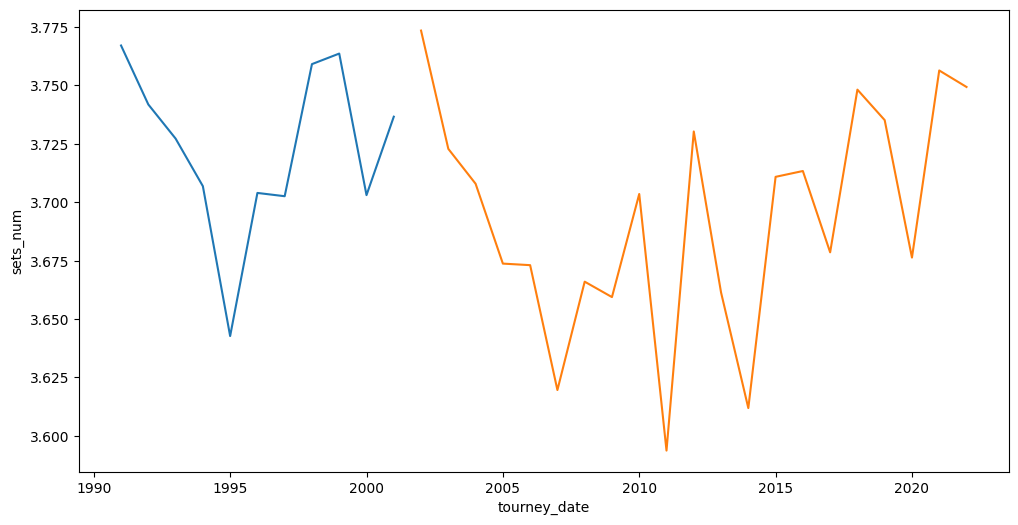

In [553]:
sns.lineplot(data = best_5_mean_less2001)
sns.lineplot(data = best_5_mean_over2022)

Здесь уже выборка зависима, т.к. играем один челока, поэтому тест Манни-Уитни

In [554]:
stats.ttest_ind(best_5_mean_less2001, best_5_mean_over2022, equal_var=True)

Ttest_indResult(statistic=1.7611467707603201, pvalue=0.08840452757183488)

In [555]:
stats.mannwhitneyu(best_5_mean_less2001, best_5_mean_over2022)

MannwhitneyuResult(statistic=154.0, pvalue=0.1316345923820011)

Здесь видим, что p-value выше 0.05, да и на графике заметная дисперсия, поэтому здесь среднее количество сетов со временем изменяется.

                            Возьмите трех игроков (они необязательно должны играть в одно и то же время. Можете взять игроков, которые сильно отличаются по рангу, а можете взять примерно равных игроков)

In [556]:
atp_matches.columns

Index(['index', 'tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'w_ace', 'w_df', 'w_svpt',
       'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
       'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_bpSaved', 'l_bpFaced', 'winner_rank', 'winner_rank_points',
       'loser_rank', 'loser_rank_points', 'diff_winner_rank', 'sets_num'],
      dtype='object')

<AxesSubplot: >

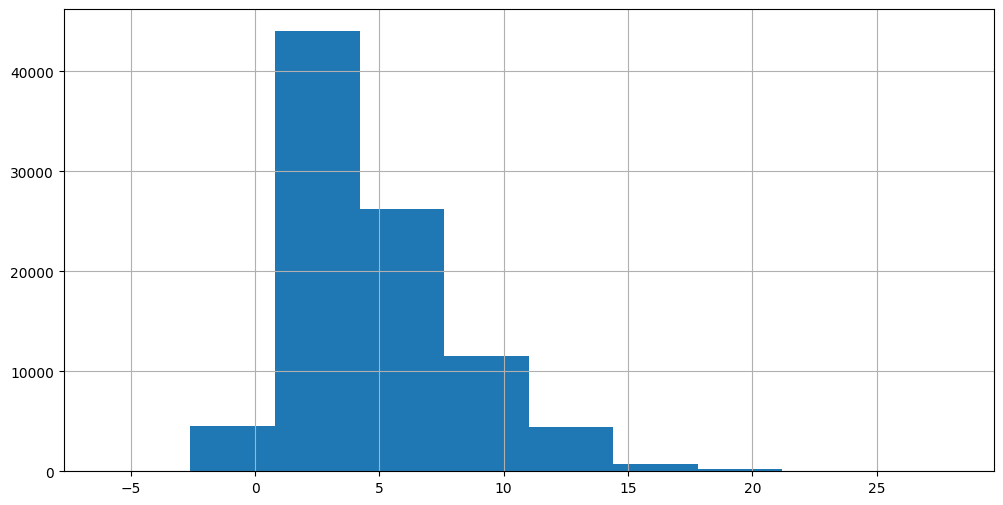

In [557]:
atp_matches['l_bpSaved'].hist()

In [605]:
atp_matches['l_bpFaced'] = atp_matches['l_bpFaced'].fillna(atp_matches['l_bpFaced'].median())
atp_matches['l_bpSaved'] = atp_matches['l_bpSaved'].fillna(atp_matches['l_bpSaved'].median())

array([[<AxesSubplot: title={'center': 'w_bpSaved'}>,
        <AxesSubplot: title={'center': 'w_bpFaced'}>]], dtype=object)

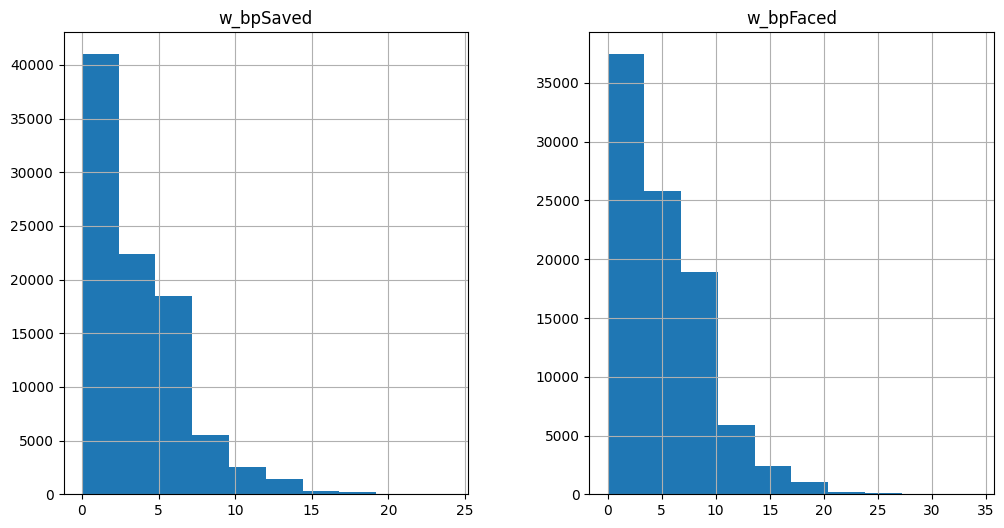

In [606]:
atp_matches[['w_bpSaved', 'w_bpFaced']].hist()

In [607]:
atp_matches['w_bpFaced'] = atp_matches['w_bpFaced'].fillna(atp_matches['w_bpFaced'].median())
atp_matches['w_bpSaved'] = atp_matches['w_bpSaved'].fillna(atp_matches['w_bpSaved'].median())

In [608]:
atp_matches['w_bpFaced'].isna().sum()

0

In [609]:
atp_matches['w_bpSaved'].isna().sum()

0

Сортируем датасет в промежутке с 2011 по 2021 (10 лет подряд)

In [610]:
player_year = pandasql.sqldf("""
    SELECT *
    FROM atp_matches
    WHERE tourney_date BETWEEN 2011 AND 2021;"""
)

In [611]:
player_year['winner_rank'].value_counts()

1.0       657
2.0       585
5.0       558
3.0       510
7.0       474
         ... 
819.0       1
762.0       1
997.0       1
773.0       1
1136.0      1
Name: winner_rank, Length: 581, dtype: int64

для каждого из них посчитайте долю выигранных брейк поинтов (колонки, заканчивающиеся на bpFaced и bpSaved) отдельно в победных и проигранных матчах за минимум 10 лет (можно больше, но годы должны идти подряд)

In [612]:
player_1 = pandasql.sqldf("""
    SELECT *
    FROM player_year
    WHERE winner_rank < 10;"""
)
player_1

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num,win_bpS/F,win_greater
0,0,2011-339,Brisbane,Hard,32,A,2011,1,104417,Robin Soderling,...,1.0,4.0,5.0,5580.0,173.0,309.0,168.0,2,1.000000,1
1,15,2011-339,Brisbane,Hard,32,A,2011,16,104053,Andy Roddick,...,2.0,6.0,8.0,3665.0,138.0,398.0,130.0,2,0.750000,1
2,16,2011-339,Brisbane,Hard,32,A,2011,17,104417,Robin Soderling,...,2.0,3.0,5.0,5580.0,58.0,835.0,53.0,2,1.000000,1
3,23,2011-339,Brisbane,Hard,32,A,2011,24,104053,Andy Roddick,...,7.0,11.0,8.0,3665.0,48.0,940.0,40.0,2,0.666667,0
4,24,2011-339,Brisbane,Hard,32,A,2011,25,104417,Robin Soderling,...,3.0,6.0,5.0,5580.0,196.0,263.0,191.0,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,2644,2021-M-DC-2021-FLS-M-RTF-SWE-01,Davis Cup Finals QF: RTF vs SWE,Hard,2,D,2021,1,126094,Andrey Rublev,...,8.0,12.0,5.0,5150.0,171.0,401.0,166.0,3,0.571429,0
4546,2645,2021-M-DC-2021-FLS-M-RTF-SWE-01,Davis Cup Finals QF: RTF vs SWE,Hard,2,D,2021,2,106421,Daniil Medvedev,...,5.0,10.0,2.0,8640.0,94.0,782.0,92.0,2,0.400000,0
4547,2647,2021-M-DC-2021-FLS-M-SRB-KAZ-01,Davis Cup Finals QF: SRB vs KAZ,Hard,2,D,2021,2,104925,Novak Djokovic,...,9.0,11.0,1.0,11540.0,36.0,1538.0,35.0,2,1.000000,1
4548,2649,2021-M-DC-2021-WG1-KOPO-UKR-NOR-01,Davis Cup WG1 PO: UKR vs NOR,Hard,4,D,2021,2,134770,Casper Ruud,...,4.0,8.0,8.0,4160.0,237.0,257.0,229.0,2,0.750000,1


In [613]:
player_2 = pandasql.sqldf("""
    SELECT *
    FROM player_year
    WHERE winner_rank BETWEEN 50 AND 500;"""
)
player_2.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num,win_bpS/F,win_greater
0,1,2011-339,Brisbane,Hard,32,A,2011,2,103582,Michael Berrer,...,3.0,5.0,58.0,835.0,75.0,643.0,17.0,3,0.800000,1
1,2,2011-339,Brisbane,Hard,32,A,2011,3,105051,Matthew Ebden,...,4.0,8.0,196.0,263.0,204.0,243.0,8.0,3,0.333333,0
2,5,2011-339,Brisbane,Hard,32,A,2011,6,103285,Radek Stepanek,...,5.0,10.0,62.0,795.0,67.0,724.0,5.0,3,0.400000,0
3,6,2011-339,Brisbane,Hard,32,A,2011,7,105575,Ricardas Berankis,...,5.0,9.0,87.0,587.0,78.0,627.0,9.0,2,0.500000,0
4,9,2011-339,Brisbane,Hard,32,A,2011,10,104731,Kevin Anderson,...,1.0,3.0,61.0,813.0,137.0,400.0,76.0,2,NaN,0


In [614]:
player_3 = pandasql.sqldf("""
    SELECT *
    FROM player_year
    WHERE winner_rank > 500;"""
)
player_3.head()

,index,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_name,...,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,diff_winner_rank,sets_num,win_bpS/F,win_greater
0,1157,2011-5053,Belgrade,Clay,28,A,2011,8,103602,Fernando Gonzalez,...,5.0,11.0,516.0,55.0,156.0,377.0,360.0,2,0.666667,0
1,1781,2011-315,Newport,Grass,32,A,2011,13,103163,Tommy Haas,...,4.0,6.0,728.0,20.0,83.0,635.0,645.0,2,0.800000,1
2,2155,2011-418,Washington,Hard,48,A,2011,10,103163,Tommy Haas,...,3.0,6.0,576.0,40.0,242.0,203.0,334.0,2,1.000000,1
3,2400,2011-560,US Open,Hard,128,G,2011,51,103444,Jean Rene Lisnard,...,9.0,17.0,542.0,50.0,77.0,669.0,465.0,3,0.666667,0
4,2403,2011-560,US Open,Hard,128,G,2011,54,106058,Jack Sock,...,4.0,8.0,555.0,47.0,97.0,562.0,458.0,4,0.500000,0


Возьмем 1 игрока 3 ранга - 'Stefanos Tsitsipas'
Возьмем 2 игрока 87 ранга - 'Ricardas Berankis'
Возьмем 3 игрока 917 ранга - 'Marton Fucsovics'

In [615]:
player_year['win_bpS/F'] = player_year['w_bpSaved'] / player_year['w_bpFaced']
player_year['lose_bpS/F'] = player_year['l_bpSaved'] / player_year['l_bpFaced']

In [616]:
player_1 = player_year[player_year['winner_name'] == 'Stefanos Tsitsipas']
player_2 = player_year[player_year['winner_name'] == 'Ricardas Berankis']
player_3 = player_year[player_year['winner_name'] == 'Marton Fucsovics']

<AxesSubplot: xlabel='tourney_date'>

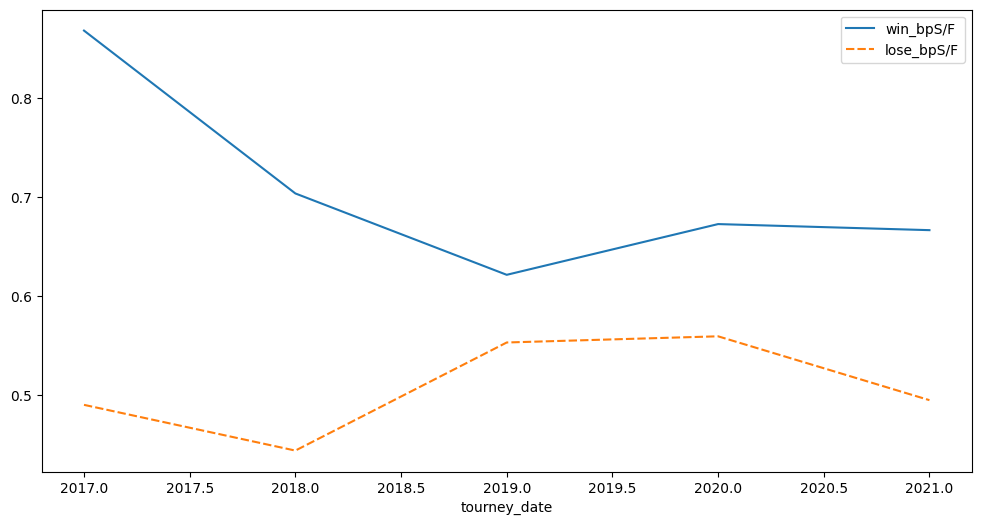

In [617]:
player_1_w = (
     player_1['win_bpS/F']
    .groupby(player_1["tourney_date"])
    .mean()
)
player_1_l = (
     player_1['lose_bpS/F']
    .groupby(player_1["tourney_date"])
    .mean()
)
player_1_bp = pd.merge(player_1_w, player_1_l, on='tourney_date')
sns.lineplot(data=player_1_bp[["win_bpS/F", "lose_bpS/F"]])

In [618]:
player_1_bp

,win_bpS/F,lose_bpS/F
tourney_date,,
2017,0.868421,0.490476
2018,0.703956,0.444291
2019,0.621786,0.553451
2020,0.673016,0.559685
2021,0.666886,0.495214


c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

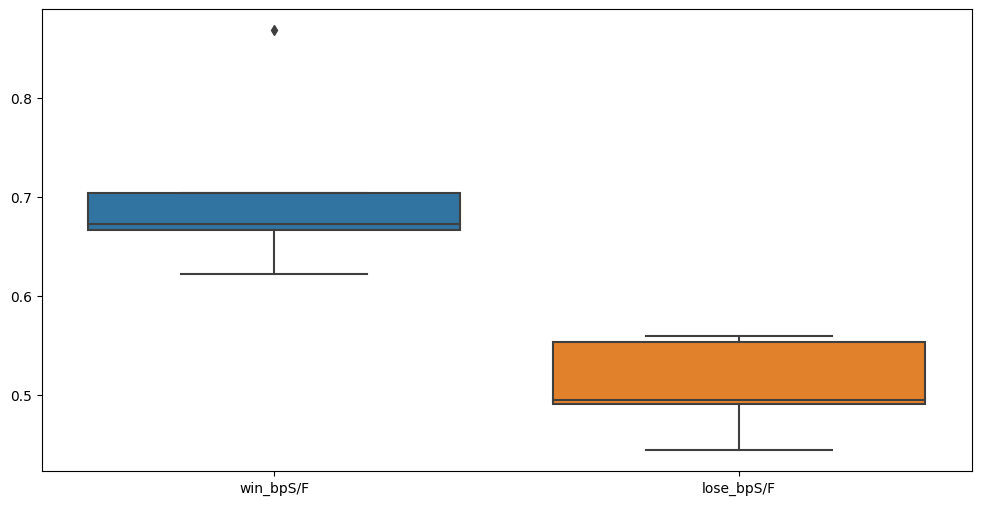

In [619]:
sns.boxplot(data=player_1_bp)

In [620]:
stats.ttest_ind(player_1_bp['win_bpS/F'], player_1_bp['lose_bpS/F'])

Ttest_indResult(statistic=4.161783595634131, pvalue=0.003157479112243123)

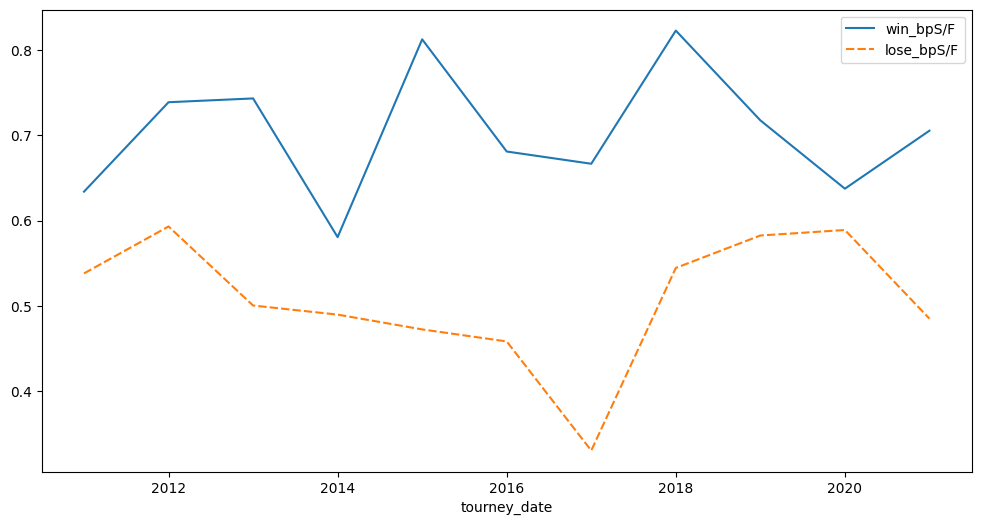

In [621]:
player_2_w = (
     player_2['win_bpS/F']
    .groupby(player_2["tourney_date"])
    .mean()
)
player_2_l = (
     player_2['lose_bpS/F']
    .groupby(player_2["tourney_date"])
    .mean()
)
player_2_bp = pd.merge(player_2_w, player_2_l, on='tourney_date')
sns.lineplot(data=player_2_bp[["win_bpS/F", "lose_bpS/F"]]);

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

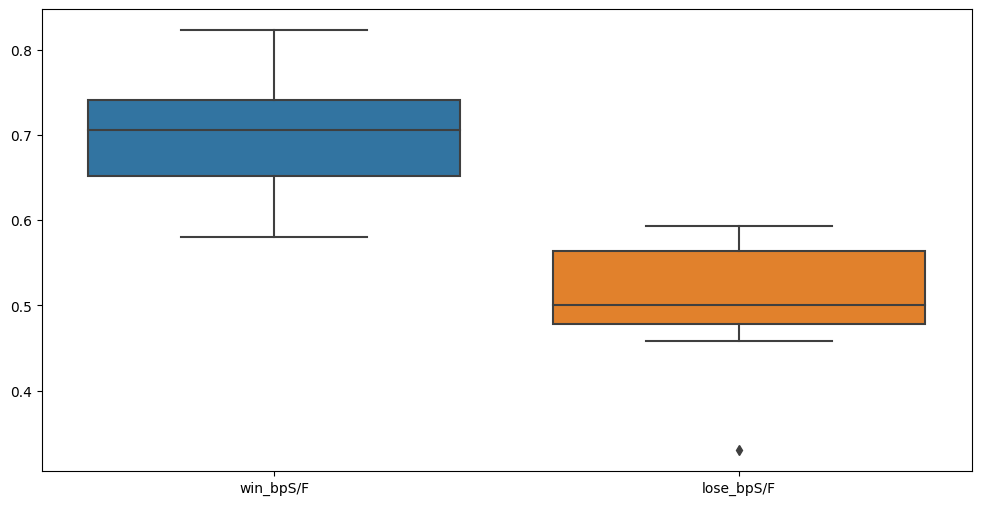

In [622]:
sns.boxplot(data=player_2_bp)

In [623]:
stats.ttest_ind(player_2_bp['win_bpS/F'], player_2_bp['lose_bpS/F'])

Ttest_indResult(statistic=6.113491108098428, pvalue=5.650977038622256e-06)

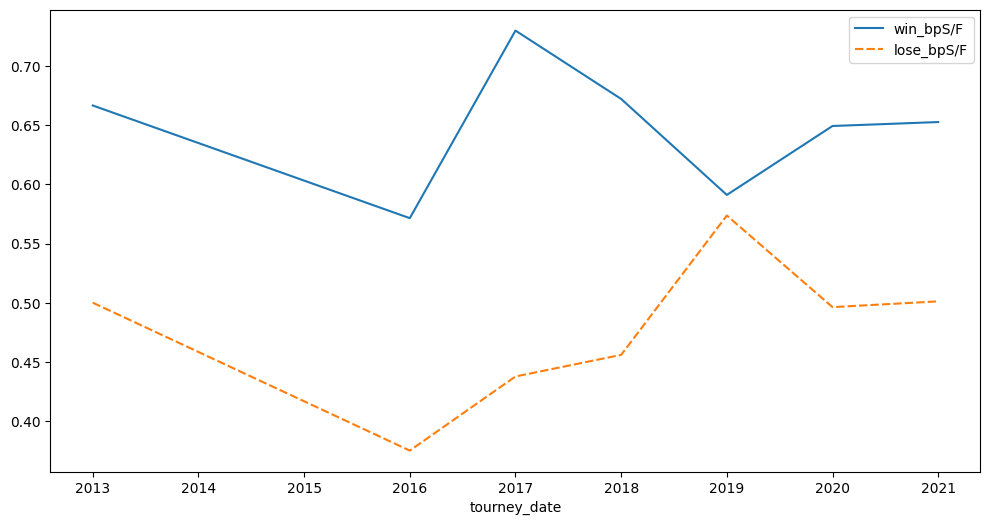

In [624]:
player_3_w = (
     player_3['win_bpS/F']
    .groupby(player_3["tourney_date"])
    .mean()
)
player_3_l = (
     player_3['lose_bpS/F']
    .groupby(player_3["tourney_date"])
    .mean()
)
player_3_bp = pd.merge(player_3_w, player_3_l, on='tourney_date')
sns.lineplot(data=player_3_bp[["win_bpS/F", "lose_bpS/F"]]);

c:\Users\rinen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

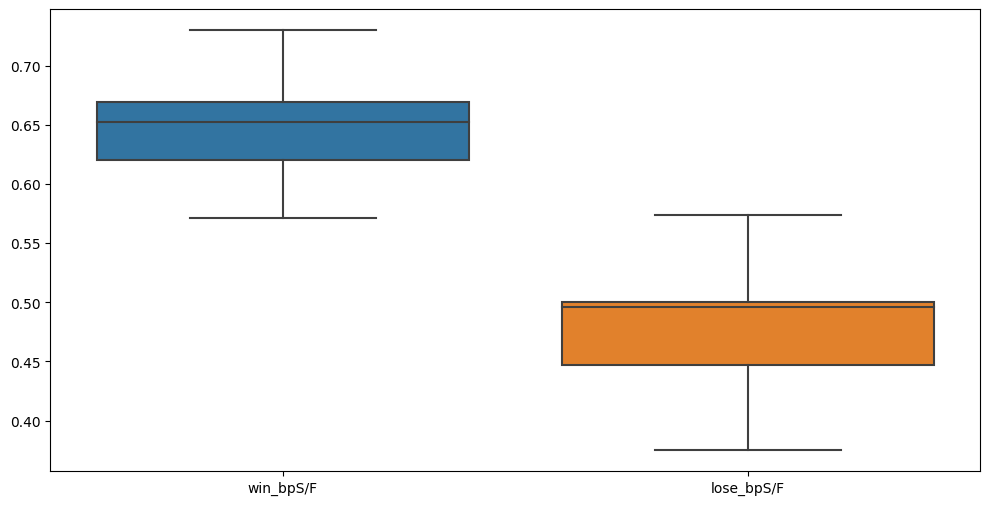

In [625]:
sns.boxplot(data=player_3_bp)

In [626]:
stats.ttest_ind(player_3_bp['win_bpS/F'], player_3_bp['lose_bpS/F'])

Ttest_indResult(statistic=5.525660673897912, pvalue=0.00013076597937034684)

У вас есть гипотеза, что доля выигранных брейк-поинтов связана с вероятностью победить в игре. Соберите статистику, где для каждого матча будет собран его исход (победа/поражение) и доля выигранных брейк-поинтов (не забудьте, что в матче два игрока). Разделите долю выигранных брейкпоинтов на группы выше/ниже медианы и, используя информацию о исходе матча, проверьте зависимость между количеством выигранных брейкпоинтов и результатом матча. Насколько сильна эта зависимость? Выбор статистического теста обоснуйте.

In [627]:
atp_matches['w_bpSaved'].isna().sum()

0

In [628]:
atp_matches['w_bpFaced'].isna().sum()

0

In [629]:
atp_matches['win_bpS/F'] = atp_matches['w_bpSaved'] / atp_matches['w_bpFaced']

In [630]:
atp_matches['win_bpS/F'].isna().sum()

8196

<AxesSubplot: >

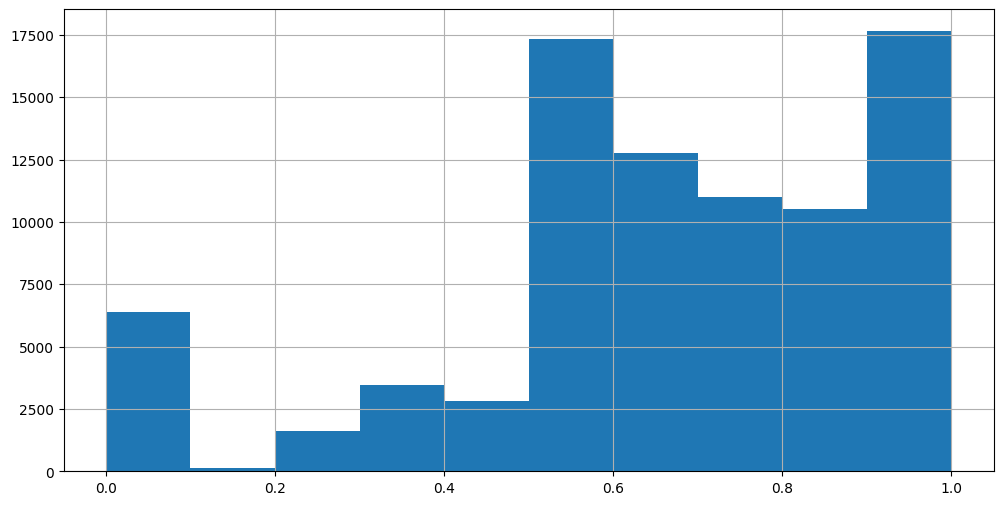

In [631]:
atp_matches['win_bpS/F'].hist()

In [585]:
#values = {
#   'win_bpS/F': atp_matches['win_bpS/F'].mean()
#}
#atp_matches = atp_matches.fillna(values)
#atp_matches['win_bpS/F'].isna().sum()

In [586]:
#atp_matches['win_bpS/F'].hist()

In [632]:
atp_matches['winner_name'].value_counts()

Roger Federer            1195
Rafael Nadal             1043
Novak Djokovic            994
David Ferrer              707
Andy Murray               689
                         ... 
Sebastian Rieschick         1
Nicolas Renavand            1
Mathieu Rodrigues           1
Pierre Ludovic Duclos       1
Petros Tsitsipas            1
Name: winner_name, Length: 1515, dtype: int64

In [633]:
atp_matches['win_greater'] = atp_matches["win_bpS/F"] > atp_matches["win_bpS/F"].median()
atp_matches['win_greater'].tail()

91855    False
91856    False
91857     True
91858     True
91859    False
Name: win_greater, dtype: bool

In [648]:
Marton = atp_matches.loc[(atp_matches['winner_name'] == 'Marton Fucsovics') | (atp_matches['loser_name'] == 'Marton Fucsovics')].copy()
Marton_win = atp_matches.loc[atp_matches['winner_name'] == 'Marton Fucsovics'].copy()
Marton_loss = atp_matches.loc[atp_matches['loser_name'] == 'Marton Fucsovics'].copy()

In [666]:
bp_win = pd.concat([(Marton_win['win_bpS/F']).reset_index(drop=True), pd.Series(np.ones_like(Marton_win['win_bpS/F']), name='win')], axis=1)
bp_lose = pd.concat([(Marton_loss['win_bpS/F']).reset_index(drop=True), pd.Series(np.zeros_like(Marton_loss['win_bpS/F']), name='win')], axis=1)

In [667]:
bp_lose

,win_bpS/F,win
0,0.857143,0.0
1,0.636364,0.0
2,0.555556,0.0
3,0.500000,0.0
4,0.714286,0.0
...,...,...
112,0.400000,0.0
113,0.500000,0.0
114,0.750000,0.0
115,0.750000,0.0


In [651]:
bp_win_lose = pd.concat([bp_win, bp_lose])

In [652]:
bp_win_lose = bp_win_lose.rename(columns={0:'bp_Saved'})
bp_win_lose

,win_bpS/F,win
0,0.666667,1.0
1,0.571429,1.0
2,0.571429,1.0
3,0.750000,1.0
4,0.714286,1.0
...,...,...
112,0.400000,0.0
113,0.500000,0.0
114,0.750000,0.0
115,0.750000,0.0


In [662]:
bp_win_lose['win_greater'] = bp_win_lose["win_bpS/F"] > Marton["win_bpS/F"].median()

<AxesSubplot: xlabel='win', ylabel='win_bpS/F'>

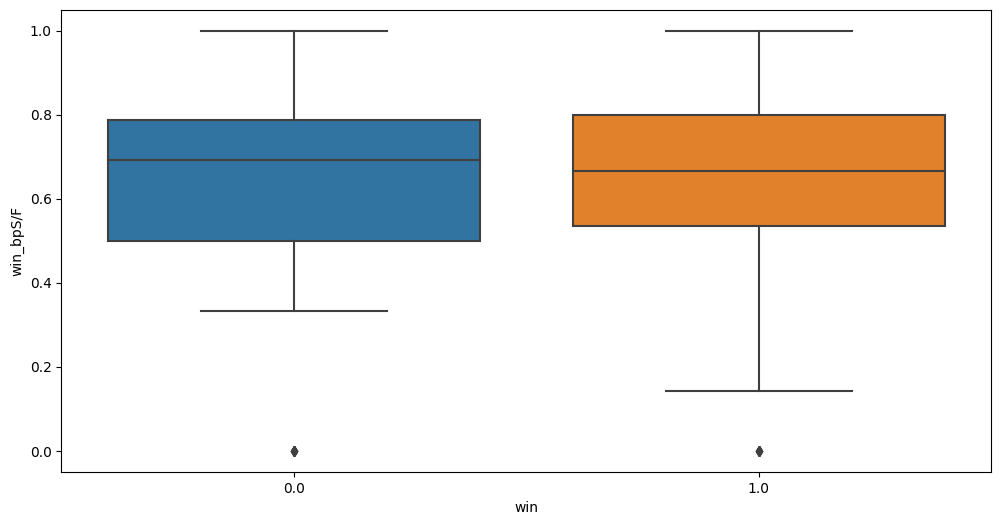

In [663]:
sns.boxplot(data=bp_win_lose, x='win', y='win_bpS/F')

In [664]:
pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater'])

win_greater,False,True
win,,
False,60,57
True,64,47


In [656]:
stats.chi2_contingency(pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater']))

(1.1312473755912666,
 0.28750942777211674,
 1,
 array([[73.38157895, 43.61842105],
        [69.61842105, 41.38157895]]))

In [657]:
chisq_stats = stats.chi2_contingency(pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater']), correction=False)[0]

In [658]:
n = np.sum(pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater']))

In [659]:
n = n.sum()

In [660]:
minshape = min(pd.crosstab(bp_win_lose["win"].astype(bool), bp_win_lose['win_greater']).shape)-1

In [661]:
cramer = np.sqrt((chisq_stats/n)/minshape)
cramer

0.0795121663818034

Немного странные выводы, думаю не совсем правильно сделана выборка. Судя по данным - такой взаимосвязи нет